In [1]:
import os
import numpy as np
import cv2 as cv
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import import_ipynb
from image_processing_functions import read_image, canny_edge_response, adaptive_gaussian_threshold, \
    adaptive_mean_threshold, automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points, corners_on_image, \
    crop_image, warp_image
from hierarchical_clusterizations import cluster_lines, augment_cluster_lines, cluster_points, augment_cluster_points, houghp_cluster_lines, houghp_cluster_points
from kmeans_clusterizations import kmeans_cluster_lines, augment_kmcluster_lines, kmeans_cluster_points, augment_kmcluster_points, houghp_kmeans_cluster_lines, houghp_kmeans_cluster_points

filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'
filename_2 = "C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 2/train/0028.png"

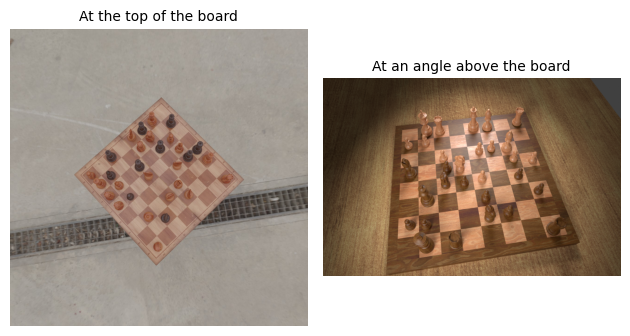

In [3]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(mpimg.imread("C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/28.jpg"))
axes[0].set_title('At the top of the board', fontsize=10)
axes[0].axis('off')

axes[1].imshow(mpimg.imread("C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 2/train/0028.png"))
axes[1].set_title('At an angle above the board', fontsize=10)
axes[1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

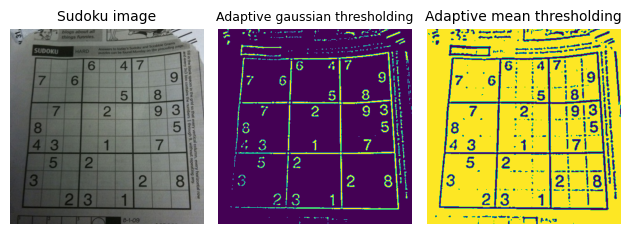

In [8]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread('results/hsLhe.jpg'))
axes[0].set_title('Sudoku image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(adaptive_gaussian_threshold(read_image('results/hsLhe.jpg'), 9, 7))
axes[1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[1].axis('off')

axes[2].imshow(adaptive_mean_threshold(read_image('results/hsLhe.jpg'), 9, 7))
axes[2].set_title('Adaptive mean thresholding', fontsize=10)
axes[2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

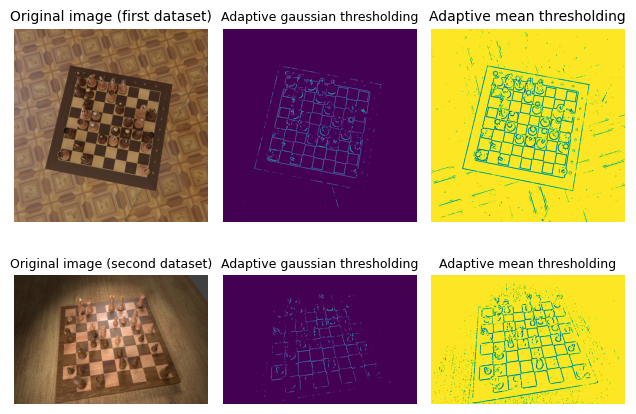

In [9]:
fig, axes = plt.subplots(2, 3)

axes[0,0].imshow(mpimg.imread(filename))
axes[0,0].set_title('Original image (first dataset)', fontsize=10)
axes[0,0].axis('off')

axes[0,1].imshow(adaptive_gaussian_threshold(read_image(filename), 9, 7))
axes[0,1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[0,1].axis('off')

axes[0,2].imshow(adaptive_mean_threshold(read_image(filename), 9, 7))
axes[0,2].set_title('Adaptive mean thresholding', fontsize=10)
axes[0,2].axis('off')

axes[1,0].imshow(mpimg.imread(filename_2))
axes[1,0].set_title('Original image (second dataset)', fontsize=9)
axes[1,0].axis('off')

axes[1,1].imshow(adaptive_gaussian_threshold(read_image(filename_2), 9, 7))
axes[1,1].set_title('Adaptive gaussian thresholding', fontsize=9)
axes[1,1].axis('off')

axes[1,2].imshow(adaptive_mean_threshold(read_image(filename_2), 9, 7))
axes[1,2].set_title('Adaptive mean thresholding', fontsize=9)
axes[1,2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

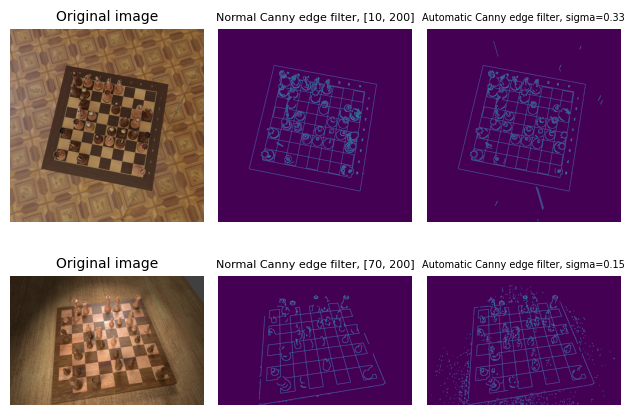

In [13]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 3)

# Plot each image in a separate subplot
axes[0, 0].imshow(mpimg.imread(filename))
axes[0, 0].set_title('Original image', fontsize=10)
axes[0, 0].axis('off')

axes[0, 1].imshow(canny_edge_response(read_image(filename), 10, 200))
axes[0, 1].set_title('Normal Canny edge filter, [10, 200]', fontsize=8)
axes[0, 1].axis('off')

axes[0, 2].imshow(automatic_canny_edge_response(read_image(filename), 0.33))
axes[0, 2].set_title('Automatic Canny edge filter, sigma=0.33', fontsize=7)
axes[0, 2].axis('off')

axes[1, 0].imshow(mpimg.imread(filename_2))
axes[1, 0].set_title('Original image', fontsize=10)
axes[1, 0].axis('off')

axes[1, 1].imshow(canny_edge_response(read_image(filename_2), 70, 200))
axes[1, 1].set_title('Normal Canny edge filter, [70, 200]', fontsize=8)
axes[1, 1].axis('off')

axes[1, 2].imshow(automatic_canny_edge_response(read_image(filename_2), 0.15))
axes[1, 2].set_title('Automatic Canny edge filter, sigma=0.15', fontsize=7)
axes[1, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

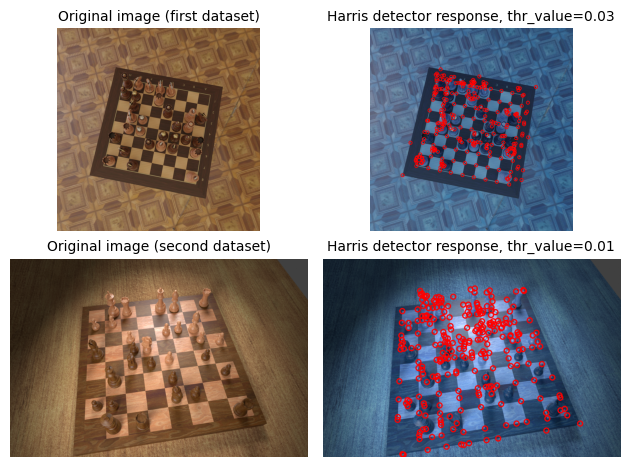

In [22]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(mpimg.imread(filename))
axes[0, 0].set_title('Original image (first dataset)', fontsize=10)
axes[0, 0].axis('off')

axes[0, 1].imshow(harris_corner_response(read_image(filename), 0.03)['img'])
axes[0, 1].set_title('Harris detector response, thr_value=0.03', fontsize=10)
axes[0, 1].axis('off')

axes[1, 0].imshow(mpimg.imread(filename_2))
axes[1, 0].set_title('Original image (second dataset)', fontsize=10)
axes[1, 0].axis('off')

axes[1, 1].imshow(harris_corner_response(read_image(filename_2), 0.01)['img'])
axes[1, 1].set_title('Harris detector response, thr_value=0.01', fontsize=10)
axes[1, 1].axis('off')

plt.tight_layout()

plt.show()

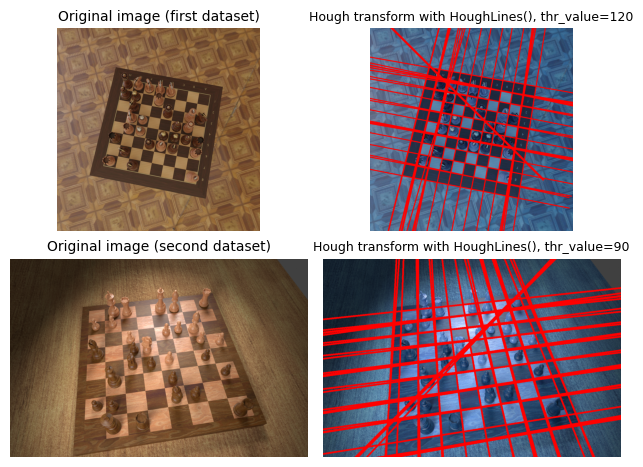

In [47]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(mpimg.imread(filename))
axes[0, 0].set_title('Original image (first dataset)', fontsize=10)
axes[0, 0].axis('off')

axes[0, 1].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[0, 1].set_title('Hough transform with HoughLines(), thr_value=120', fontsize=9)
axes[0, 1].axis('off')

axes[1, 0].imshow(mpimg.imread(filename_2))
axes[1, 0].set_title('Original image (second dataset)', fontsize=10)
axes[1, 0].axis('off')

axes[1, 1].imshow(hough_line_detect_response(read_image(filename_2), threshold=80, canny_thr=(70, 200))['img'])
axes[1, 1].set_title('Hough transform with HoughLines(), thr_value=90', fontsize=9)
axes[1, 1].axis('off')

plt.tight_layout()

plt.show()

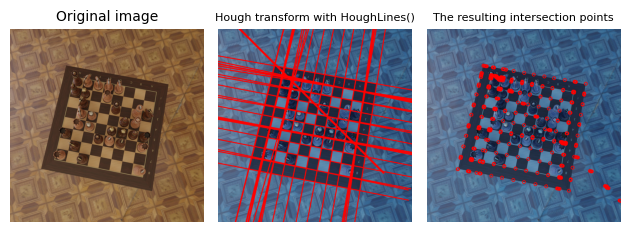

In [37]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[1].set_title('Hough transform with HoughLines()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(hough_line_intersections(read_image(filename))['img'])
axes[2].set_title('The resulting intersection points', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

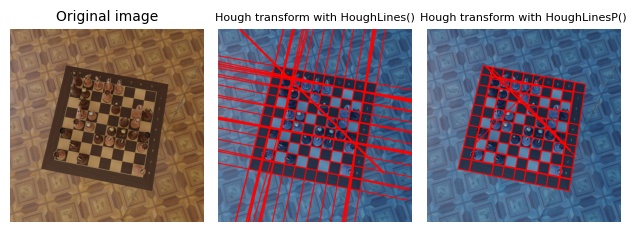

In [7]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[1].set_title('Hough transform with HoughLines()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[2].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

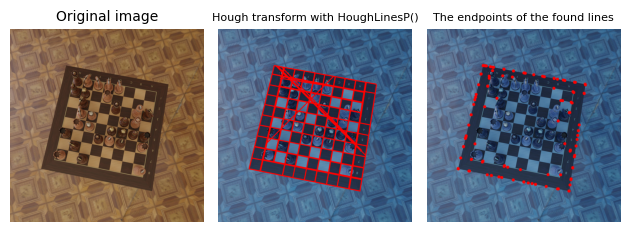

In [48]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[1].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(houghp_line_points(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[2].set_title('The endpoints of the found lines', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

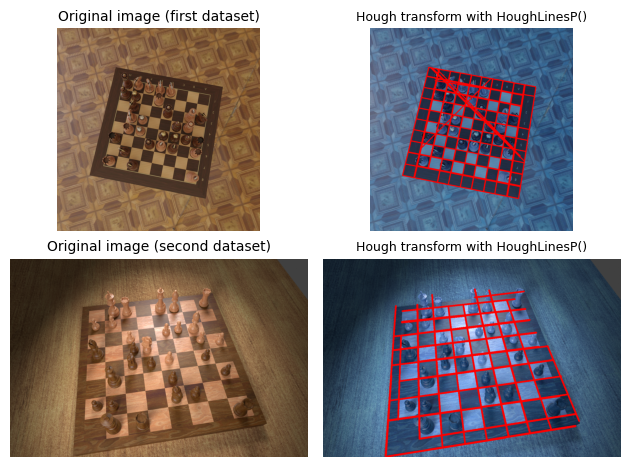

In [6]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(mpimg.imread(filename))
axes[0, 0].set_title('Original image (first dataset)', fontsize=10)
axes[0, 0].axis('off')

axes[0, 1].imshow(houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[0, 1].set_title('Hough transform with HoughLinesP()', fontsize=9)
axes[0, 1].axis('off')

axes[1, 0].imshow(mpimg.imread(filename_2))
axes[1, 0].set_title('Original image (second dataset)', fontsize=10)
axes[1, 0].axis('off')

axes[1, 1].imshow(houghp_line_detect_response(read_image(filename_2), threshold=80, minLineLength=100, maxLineGap=100, canny_thr=(40, 200))['img'])
axes[1, 1].set_title('Hough transform with HoughLinesP()', fontsize=9)
axes[1, 1].axis('off')

plt.tight_layout()

plt.show()

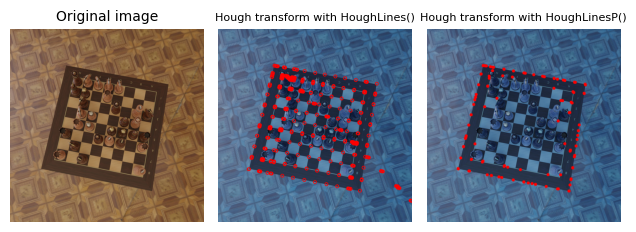

In [8]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(mpimg.imread(filename))
axes[0].set_title('Original image', fontsize=10)
axes[0].axis('off')

axes[1].imshow(hough_line_intersections(read_image(filename))['img'])
axes[1].set_title('Hough transform with HoughLines()', fontsize=8)
axes[1].axis('off')

axes[2].imshow(houghp_line_points(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)['img'])
axes[2].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[2].axis('off')

plt.tight_layout()

plt.show()

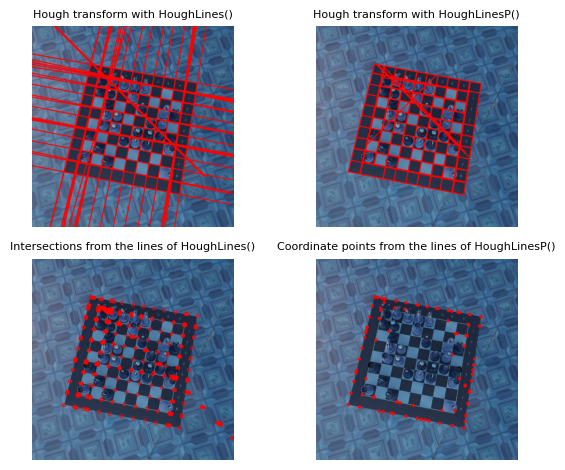

In [9]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(hough_line_detect_response(read_image(filename))['img'])
axes[0,0].set_title('Hough transform with HoughLines()', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(houghp_line_detect_response(read_image(filename))['img'])
axes[0,1].set_title('Hough transform with HoughLinesP()', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(hough_line_intersections(read_image(filename))['img'])
axes[1,0].set_title('Intersections from the lines of HoughLines()', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(houghp_line_points(read_image(filename))['img'])
axes[1,1].set_title('Coordinate points from the lines of HoughLinesP()', fontsize=8)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

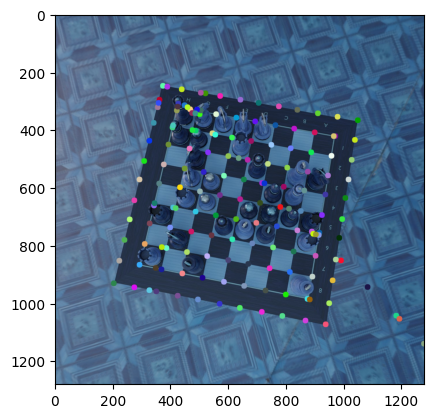

In [4]:
# hierarchical dataset 1, non-probabilistic
prdataset_hl = hough_line_detect_response(read_image(filename))
clusters_prdataset_hl = cluster_lines(filename, prdataset_hl['coords'])
augment_clusters_prdataset_hl = augment_cluster_lines(clusters_prdataset_hl)

prdataset_hl_inters = hough_line_intersections(read_image(filename))
clusters_prdataset_hl_inters = cluster_points(filename, prdataset_hl_inters['list'])
augment_clusters_prdataset_hl_inters = augment_cluster_points(clusters_prdataset_hl_inters)

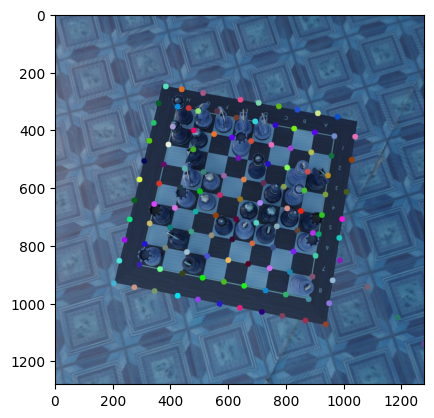

In [5]:
# k-means dataset 1, non-probabilistic
kmclusters_prdataset_hl = kmeans_cluster_lines(filename, prdataset_hl['coords'], 24)
augment_kmclusters_prdataset_hl = augment_kmcluster_lines(kmclusters_prdataset_hl)

kmclusters_prdataset_hl_inters = kmeans_cluster_points(filename, prdataset_hl_inters['list'], 121)
augment_kmclusters_prdataset_hl_inters = augment_kmcluster_points(kmclusters_prdataset_hl_inters)

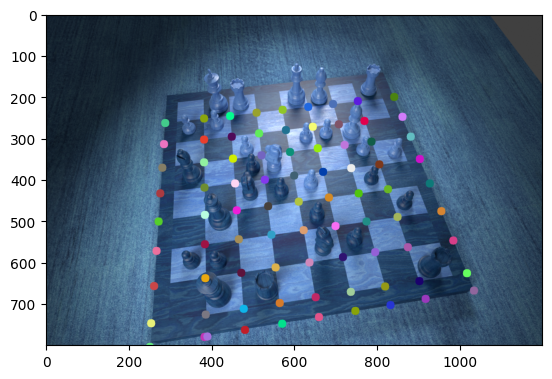

In [13]:
# hierarchical dataset 2, non-probabilistic
scdataset_hl = hough_line_detect_response(read_image(filename_2), threshold=100, canny_thr=(60, 200))
clusters_scdataset_hl = cluster_lines(filename_2, scdataset_hl['coords'])
augment_clusters_scdataset_hl = augment_cluster_lines(clusters_scdataset_hl)

scdataset_hl_inters = hough_line_intersections(read_image(filename_2), threshold=100, canny_thr=(60, 200))
clusters_scdataset_hl_inters = cluster_points(filename_2, scdataset_hl_inters['list'])
augment_clusters_scdataset_hl_inters = augment_cluster_points(clusters_scdataset_hl_inters)

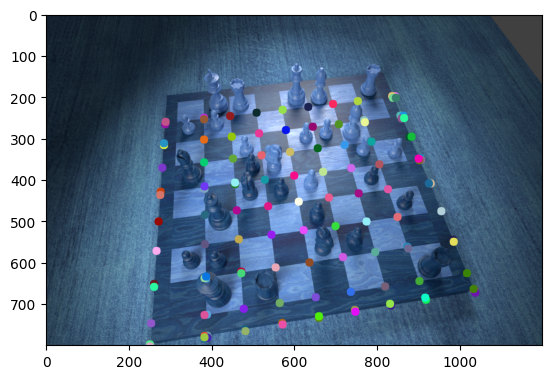

In [14]:
# kmeans dataset 2, non-probabilistic
kmclusters_scdataset_hl = kmeans_cluster_lines(filename_2, scdataset_hl['coords'], 24)
augment_kmclusters_scdataset_hl = augment_kmcluster_lines(kmclusters_scdataset_hl)

kmclusters_scdataset_hl_inters = kmeans_cluster_points(filename_2, scdataset_hl_inters['list'], 121)
augment_kmclusters_scdataset_hl_inters = augment_kmcluster_points(kmclusters_scdataset_hl_inters)

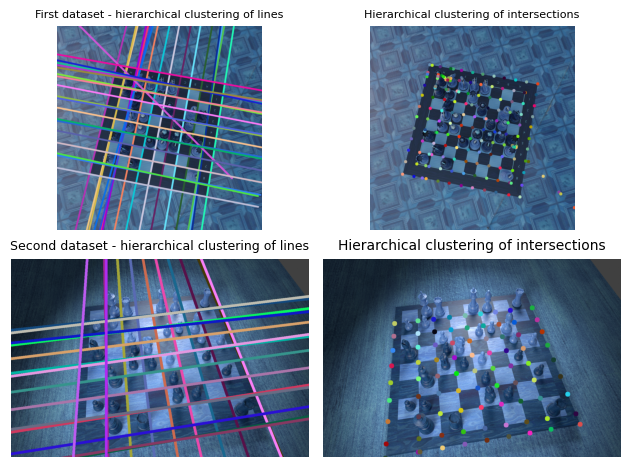

In [7]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(augment_clusters_prdataset_hl['img'])
axes[0,0].set_title('First dataset - hierarchical clustering of lines', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(augment_clusters_prdataset_hl_inters['img'])
axes[0,1].set_title('Hierarchical clustering of intersections', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(augment_clusters_scdataset_hl['img'])
axes[1,0].set_title('Second dataset - hierarchical clustering of lines', fontsize=9)
axes[1,0].axis('off')

axes[1,1].imshow(augment_clusters_scdataset_hl_inters['img'])
axes[1,1].set_title('Hierarchical clustering of intersections', fontsize=10)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

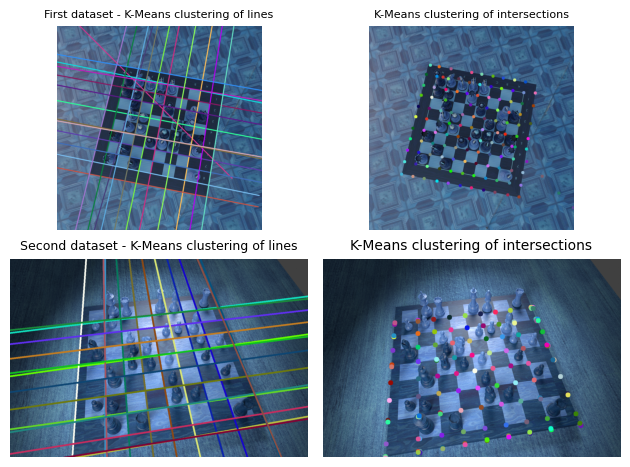

In [24]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(augment_kmclusters_prdataset_hl['img'])
axes[0,0].set_title('First dataset - K-Means clustering of lines', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(augment_kmclusters_prdataset_hl_inters['img'])
axes[0,1].set_title('K-Means clustering of intersections', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(augment_kmclusters_scdataset_hl['img'])
axes[1,0].set_title('Second dataset - K-Means clustering of lines', fontsize=9)
axes[1,0].axis('off')

axes[1,1].imshow(augment_kmclusters_scdataset_hl_inters['img'])
axes[1,1].set_title('K-Means clustering of intersections', fontsize=10)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

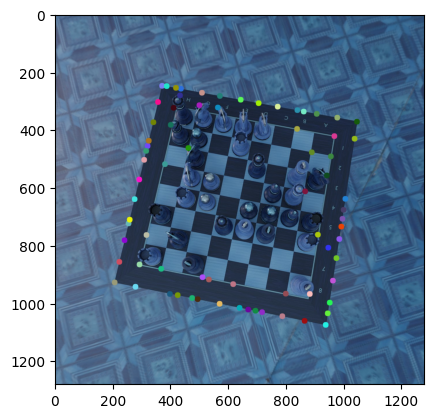

In [15]:
# hierarchical dataset 1, probabilistic
prdataset_hlp = houghp_line_detect_response(read_image(filename))
clusters_prdataset_hlp = houghp_cluster_lines(filename, prdataset_hlp)
augment_clusters_prdataset_hlp = augment_cluster_lines(clusters_prdataset_hlp)

prdataset_hlp_points = houghp_line_points(read_image(filename))
clusters_prdataset_hlp_points = houghp_cluster_points(filename, prdataset_hlp_points)
augment_clusters_prdataset_hlp_points = augment_cluster_points(clusters_prdataset_hlp_points)

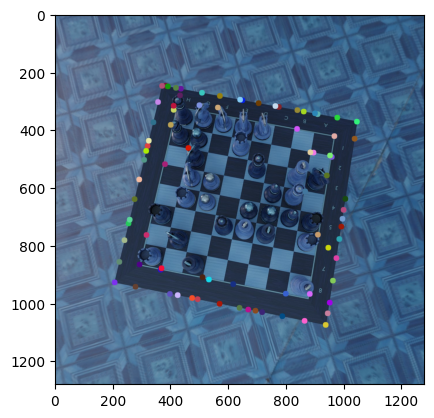

In [16]:
# kmeans dataset 1, probabilistic
kmclusters_prdataset_hlp = houghp_kmeans_cluster_lines(filename, prdataset_hlp, 27)
augment_kmclusters_prdataset_hlp = augment_kmcluster_lines(kmclusters_prdataset_hlp)

kmclusters_prdataset_hlp_points = houghp_kmeans_cluster_points(filename, prdataset_hlp_points, 81)
augment_kmclusters_prdataset_hlp_points = augment_kmcluster_points(kmclusters_prdataset_hlp_points)

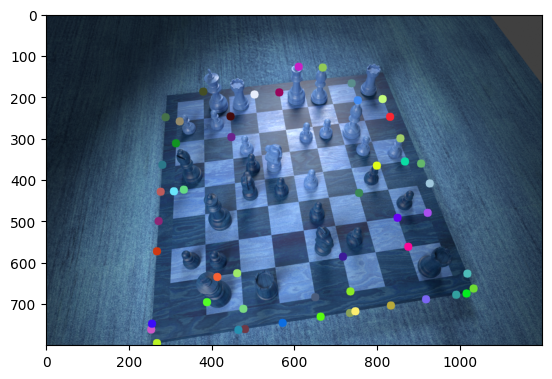

In [17]:
# hierarchical dataset 2, probabilistic
scdataset_hlp = houghp_line_detect_response(read_image(filename_2), threshold=100, canny_thr=(60, 200))
clusters_scdataset_hlp = houghp_cluster_lines(filename_2, scdataset_hlp)
augment_clusters_scdataset_hlp = augment_cluster_lines(clusters_scdataset_hlp)

scdataset_hlp_points = houghp_line_points(read_image(filename_2), threshold=100, canny_thr=(60, 200))
clusters_scdataset_hlp_points = houghp_cluster_points(filename_2, scdataset_hlp_points)
augment_clusters_scdataset_hlp_points = augment_cluster_points(clusters_scdataset_hlp_points)

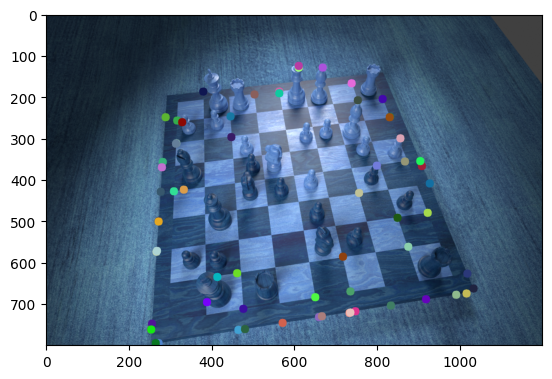

In [22]:
# kmeans dataset 2, probabilistic
kmclusters_scdataset_hlp = houghp_kmeans_cluster_lines(filename_2, scdataset_hlp, 27)
augment_kmclusters_scdataset_hlp = augment_kmcluster_lines(kmclusters_scdataset_hlp)

kmclusters_scdataset_hlp_points = houghp_kmeans_cluster_points(filename_2, scdataset_hlp_points, 64)
augment_kmclusters_scdataset_hlp_points = augment_kmcluster_points(kmclusters_scdataset_hlp_points)

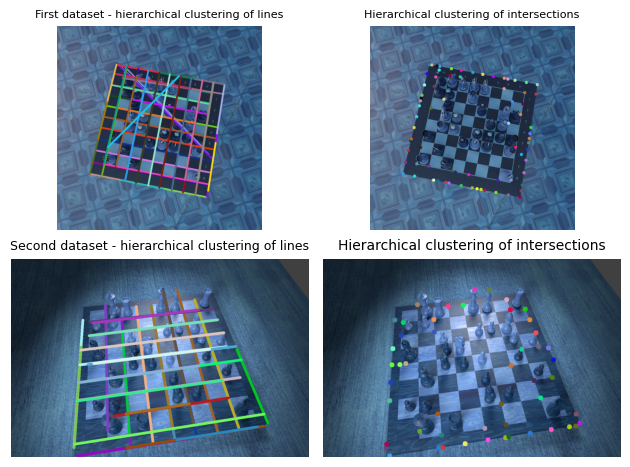

In [10]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(augment_clusters_prdataset_hlp['img'])
axes[0,0].set_title('First dataset - hierarchical clustering of probabilistic lines', fontsize=7)
axes[0,0].axis('off')

axes[0,1].imshow(augment_clusters_prdataset_hlp_points['img'])
axes[0,1].set_title('Hierarchical clustering of probabilistic line points', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(augment_clusters_scdataset_hlp['img'])
axes[1,0].set_title('Second dataset - hierarchical clustering of probabilistic lines', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(augment_clusters_scdataset_hlp_points['img'])
axes[1,1].set_title('Hierarchical clustering of probabilistic line points', fontsize=8)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

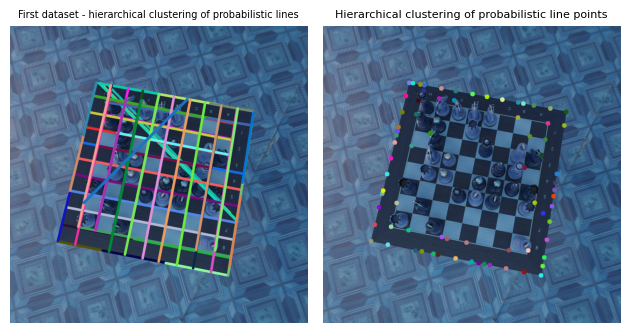

In [28]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(augment_clusters_prdataset_hlp['img'])
axes[0].set_title('First dataset - hierarchical clustering of probabilistic lines', fontsize=7)
axes[0].axis('off')

axes[1].imshow(augment_clusters_prdataset_hlp_points['img'])
axes[1].set_title('Hierarchical clustering of probabilistic line points', fontsize=8)
axes[1].axis('off')

plt.tight_layout()

plt.show()

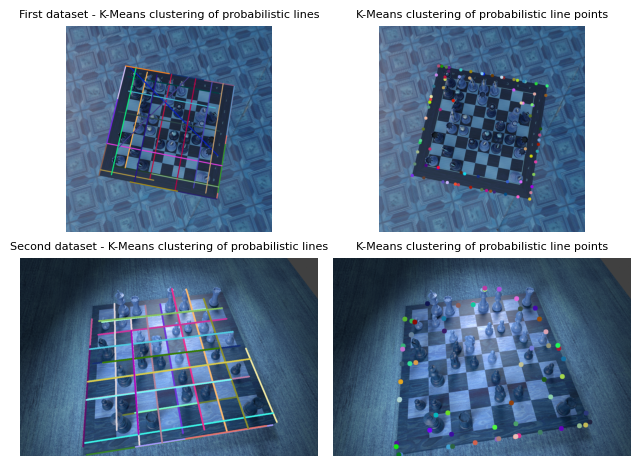

In [23]:
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(augment_kmclusters_prdataset_hlp['img'])
axes[0,0].set_title('First dataset - K-Means clustering of probabilistic lines', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(augment_kmclusters_prdataset_hlp_points['img'])
axes[0,1].set_title('K-Means clustering of probabilistic line points', fontsize=8)
axes[0,1].axis('off')

axes[1,0].imshow(augment_kmclusters_scdataset_hlp['img'])
axes[1,0].set_title('Second dataset - K-Means clustering of probabilistic lines', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(augment_kmclusters_scdataset_hlp_points['img'])
axes[1,1].set_title('K-Means clustering of probabilistic line points', fontsize=8)
axes[1,1].axis('off')

plt.tight_layout()

plt.show()

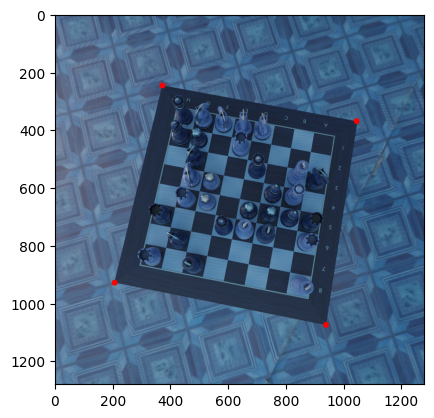

In [5]:
hough_inters = corners_on_image(read_image(filename), hough_line_intersections)
houghp_points = corners_on_image(read_image(filename), houghp_line_points)

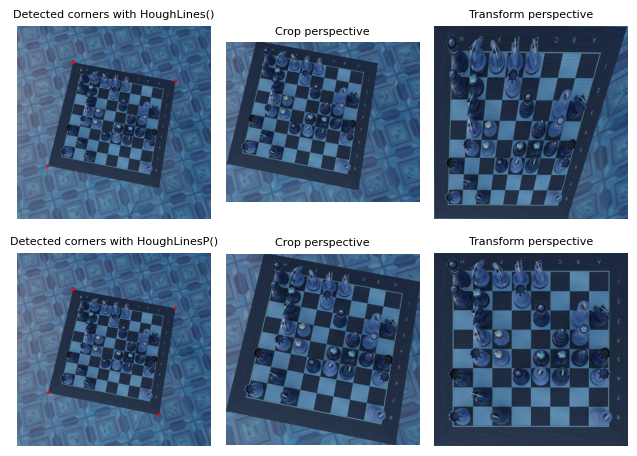

In [7]:
fig, axes = plt.subplots(2, 3)

axes[0,0].imshow(hough_inters['img'])
axes[0,0].set_title('Detected corners with HoughLines()', fontsize=8)
axes[0,0].axis('off')

axes[0,1].imshow(crop_image(read_image(filename), hough_inters))
axes[0,1].set_title('Crop perspective', fontsize=8)
axes[0,1].axis('off')

axes[0,2].imshow(warp_image(read_image(filename), hough_inters))
axes[0,2].set_title('Transform perspective', fontsize=8)
axes[0,2].axis('off')

axes[1,0].imshow(houghp_points['img'])
axes[1,0].set_title('Detected corners with HoughLinesP()', fontsize=8)
axes[1,0].axis('off')

axes[1,1].imshow(crop_image(read_image(filename), houghp_points))
axes[1,1].set_title('Crop perspective', fontsize=8)
axes[1,1].axis('off')

axes[1,2].imshow(warp_image(read_image(filename), houghp_points))
axes[1,2].set_title('Transform perspective', fontsize=8)
axes[1,2].axis('off')

plt.tight_layout()

plt.show()